In [1]:
# === Patch scikit-learn for faster processing ===
%pip install -q scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

# === Set up project root ===
import sys
from pathlib import Path

project_root = Path().resolve()
while not (project_root / 'src').exists() and project_root != project_root.parent:
    project_root = project_root.parent
sys.path.append(str(project_root))
print("Project root set to:", project_root)

# === Imports ===
import pandas as pd
import joblib
import numpy as np
from src.trained_model_ui_subset import train_on_selected_features  # Correct import


Note: you may need to restart the kernel to use updated packages.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Project root set to: C:\Users\jonat\fraud-detection-project


In [2]:

# === Paths ===
processed_dir = project_root / "data" / "processed"
model_dir = project_root / "models" / "trained_model_selected_subset"
model_dir.mkdir(parents=True, exist_ok=True)


In [3]:

# === Load Data ===
feature_columns = joblib.load(processed_dir / "feature_columns.pkl")
print("Loaded feature column names:", feature_columns[:5], "...")

X = pd.read_csv(processed_dir / "X_smote.csv", header=0)
X.columns = feature_columns

y = pd.read_csv(processed_dir / "y_smote.csv", header=0).squeeze("columns")
y = pd.to_numeric(y, errors="coerce").dropna().astype(int).reset_index(drop=True)

min_len = min(len(X), len(y))
X = X.iloc[:min_len].reset_index(drop=True)
y = y.iloc[:min_len].reset_index(drop=True)

print("Adjusted shapes for consistency:")
print("X shape:", X.shape)
print("y shape:", y.shape)


Loaded feature column names: ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3'] ...
Adjusted shapes for consistency:
X shape: (1139754, 357)
y shape: (1139754,)



=== Training RandomForest with 5-Fold Cross-Validation on Selected Features ===
Fold 1: Accuracy = 0.9902, ROC AUC = 0.9988, Time = 44.05s
Classification Report:
              precision    recall  f1-score   support

           0     0.9843    0.9962    0.9902    113934
           1     0.9962    0.9841    0.9901    114017

    accuracy                         0.9902    227951
   macro avg     0.9902    0.9902    0.9902    227951
weighted avg     0.9902    0.9902    0.9902    227951

Fold 2: Accuracy = 0.9905, ROC AUC = 0.9989, Time = 50.64s
Classification Report:
              precision    recall  f1-score   support

           0     0.9851    0.9960    0.9905    114106
           1     0.9960    0.9849    0.9904    113845

    accuracy                         0.9905    227951
   macro avg     0.9905    0.9905    0.9905    227951
weighted avg     0.9905    0.9905    0.9905    227951

Fold 3: Accuracy = 0.9902, ROC AUC = 0.9988, Time = 48.04s
Classification Report:
              preci

c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:37:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1: Accuracy = 0.9744, ROC AUC = 0.9948, Time = 7.10s
Classification Report:
              precision    recall  f1-score   support

           0     0.9565    0.9939    0.9748    113934
           1     0.9936    0.9549    0.9739    114017

    accuracy                         0.9744    227951
   macro avg     0.9751    0.9744    0.9744    227951
weighted avg     0.9751    0.9744    0.9744    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2: Accuracy = 0.9746, ROC AUC = 0.9949, Time = 6.06s
Classification Report:
              precision    recall  f1-score   support

           0     0.9575    0.9934    0.9751    114106
           1     0.9932    0.9558    0.9741    113845

    accuracy                         0.9746    227951
   macro avg     0.9753    0.9746    0.9746    227951
weighted avg     0.9753    0.9746    0.9746    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3: Accuracy = 0.9750, ROC AUC = 0.9948, Time = 6.14s
Classification Report:
              precision    recall  f1-score   support

           0     0.9572    0.9946    0.9755    114031
           1     0.9944    0.9555    0.9745    113920

    accuracy                         0.9750    227951
   macro avg     0.9758    0.9750    0.9750    227951
weighted avg     0.9758    0.9750    0.9750    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4: Accuracy = 0.9744, ROC AUC = 0.9947, Time = 6.00s
Classification Report:
              precision    recall  f1-score   support

           0     0.9561    0.9943    0.9748    113819
           1     0.9941    0.9544    0.9739    114132

    accuracy                         0.9744    227951
   macro avg     0.9751    0.9744    0.9744    227951
weighted avg     0.9751    0.9744    0.9744    227951



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5: Accuracy = 0.9751, ROC AUC = 0.9947, Time = 6.23s
Classification Report:
              precision    recall  f1-score   support

           0     0.9578    0.9939    0.9755    113987
           1     0.9937    0.9562    0.9746    113963

    accuracy                         0.9751    227950
   macro avg     0.9758    0.9751    0.9751    227950
weighted avg     0.9758    0.9751    0.9751    227950



c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:38:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


>>> XGBoost - Mean Accuracy: 0.9747, Mean ROC AUC: 0.9948

=== Training LogisticRegression with 5-Fold Cross-Validation on Selected Features ===
Fold 1: Accuracy = 0.7408, ROC AUC = 0.8196, Time = 82.34s
Classification Report:
              precision    recall  f1-score   support

           0     0.7206    0.7864    0.7521    113934
           1     0.7651    0.6952    0.7285    114017

    accuracy                         0.7408    227951
   macro avg     0.7428    0.7408    0.7403    227951
weighted avg     0.7428    0.7408    0.7403    227951

Fold 2: Accuracy = 0.7397, ROC AUC = 0.8184, Time = 79.39s
Classification Report:
              precision    recall  f1-score   support

           0     0.7199    0.7855    0.7513    114106
           1     0.7634    0.6937    0.7269    113845

    accuracy                         0.7397    227951
   macro avg     0.7417    0.7396    0.7391    227951
weighted avg     0.7416    0.7397    0.7391    227951

Fold 3: Accuracy = 0.7407, ROC AUC = 

c:\Users\jonat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


>>> MLP - Mean Accuracy: 0.9076, Mean ROC AUC: 0.9716


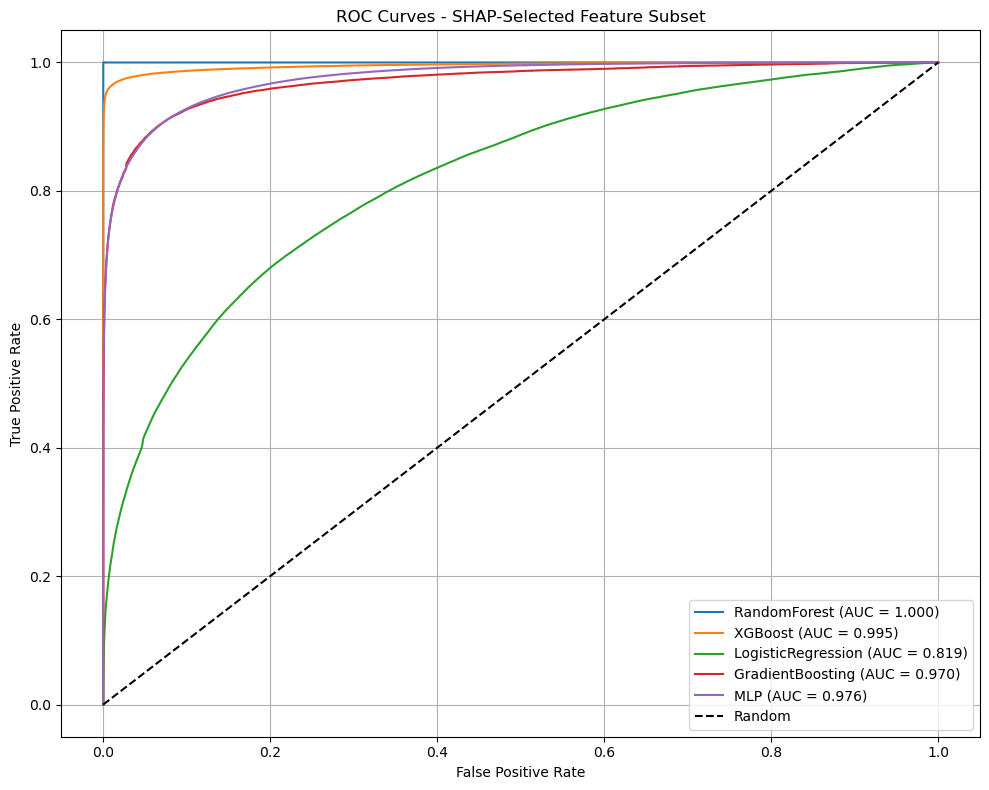

In [4]:

# === Train on Final SHAP-Selected Features ===
train_on_selected_features(X, y, save_dir=model_dir, n_splits=5)
